# Project

## Installation of newsapi Package

In [1]:
pip install newsapi

## Importing the Keys from Website

In [2]:
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key='6681a13517fe4af5b0977eb8eea7ed8d')

## Importing the Packages

In [3]:
# importing pandas, numpy, regression package.
import pandas as pd
import numpy as np
import re 

## Execution of code with an Article

In [4]:
# Get top headlines related to world in English
top_headlines = newsapi.get_top_headlines(q='world', language='en')

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    print()  # Empty line for readability
print(top_headlines)

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,200 jobs in Sweden to cope with lower orders and caution from mobile service providers.
URL: https://www.livemint.com/companies/news/ericsson-lay-off-1-200-jobs-sweden-5

## Analyzing Sentiment

In [5]:
from textblob import TextBlob
import requests

# Get top headlines related to World news in English
top_headlines = newsapi.get_top_headlines(q='world', language='en')

# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Perform sentiment analysis on the description
    description = article['description']
    sentiment_score = analyze_sentiment(description)
    print("Sentiment Score:", sentiment_score)
    
    print()  # Empty line for readability

print(top_headlines)

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Sentiment Score: 0.0

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,200 jobs in Sweden to cope with lower orders and caution from mobile service providers.
URL: https://www.livemint.com/companies/news/ericsson-lay-of

# Sentiment Analysis

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Perform sentiment analysis
    sentiment_scores = sid.polarity_scores(description)
    
    # Determine sentiment label
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    # Print sentiment analysis results
    print("Sentiment Score:", sentiment_scores['compound'])
    print("Sentiment Label:", sentiment_label)
    
    print()

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Sentiment Score: 0.1027
Sentiment Label: Positive

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,200 jobs in Sweden to cope with lower orders and caution from mobile service providers.
URL: https://www.livemint.com/c

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Summarizing Text of Headlines

In [7]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Preprocess the text (if needed)
    # Here, we'll directly use the description for summarization
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    
    print()  # Empty line for readability

print(top_headlines)

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Summary:
Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking e

## Text Classification

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Sample pre-trained model
pretrained_model = make_pipeline(
    TfidfVectorizer(),
    SVC(kernel='linear', probability=True)
)

# Sample labeled dataset
X_train = [
    "This is a positive article",
    "This is a negative article",
    "This is a neutral article"
]
y_train = ["Positive", "Negative", "Neutral"]

# Train the pre-trained model (you should replace X_train and y_train with your actual data)
pretrained_model.fit(X_train, y_train)

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Predict the category of the description
    category = pretrained_model.predict([description])[0]
    
    # Print the predicted category
    print("Predicted Category:", category)
    
    print()  # Empty line for readability

print(top_headlines)

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Predicted Category: Positive

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,200 jobs in Sweden to cope with lower orders and caution from mobile service providers.
URL: https://www.livemint.com/companies/news/ericsso

## Topic Modeling

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess the text data
descriptions = [article['description'] for article in top_headlines['articles']]

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(descriptions)

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust number of topics as needed
lda.fit(X)

# Print the topics
print("Topics in the articles:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topics in the articles:
Topic 0:
11 kohli kings june indian inclusion peppering fours punjab reached

Topic 1:
providers world biggest lower cope mobile networking caution orders 200

Topic 2:
world old 1882 24 age announced bacteria discovery dr tuberculosis

Topic 3:
world old 1882 24 age announced bacteria discovery dr tuberculosis

Topic 4:
day world old 1882 24 age announced bacteria discovery dr



## Named Entity Recognition

In [10]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Perform NER using spaCy
    doc = nlp(description)
    
    # Extract named entities
    named_entities = [(entity.text, entity.label_) for entity in doc.ents]
    
    # Print named entities
    print("Named Entities:")
    for entity, label in named_entities:
        print(f"{entity}: {label}")
    
    print()

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Named Entities:
11 fours: QUANTITY
two: CARDINAL
Kohli: PERSON
77: CARDINAL
49: CARDINAL
Punjab Kings: PRODUCT
Indian: NORP
2024: DATE
T20 World Cup: EVENT
June: DATE

Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,20

## Text Analysis

In [11]:
import nltk
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from rake_nltk import Rake
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')


# Download necessary NLTK resources
nltk.download('punkt')

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Text Length Analysis
    num_characters = len(description)
    num_words = len(word_tokenize(description))
    num_sentences = len(sent_tokenize(description))
    print("Text Length Analysis:")
    print("Number of Characters:", num_characters)
    print("Number of Words:", num_words)
    print("Number of Sentences:", num_sentences)
    
    # Named Entity Recognition (NER) Statistics
    named_entities = TextBlob(description).noun_phrases
    named_entities_count = Counter(named_entities)
    print("Named Entity Recognition (NER) Statistics:")
    print("Top 3 Most Common Named Entities:", named_entities_count.most_common(3))
    
    rake = Rake()
    rake.extract_keywords_from_text(description)
    keywords = rake.get_ranked_phrases_with_scores()[:5]  # Get top 5 keywords
    print("Keyword Extraction:")
    for score, keyword in keywords:
        print(f"Keyword: {keyword}, Score: {score}")
    
    # Emotion Analysis using TextBlob
    sentiment = TextBlob(description).sentiment
    print("Emotion Analysis:")
    print("Polarity (Emotion):", sentiment.polarity)
    print("Subjectivity:", sentiment.subjectivity)
    
    print()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/
Text Length Analysis:
Number of Characters: 188
Number of Words: 39
Number of Sentences: 1
Named Entity Recognition (NER) Statistics:
Top 3 Most Common Named Entities: [('peppering', 1), ('kohli', 1), ('punjab', 1)]
Keyword Extraction:
Keyword: 2024 t20 world cup, Score: 16.0
Keyword: kohli reached 77, Score: 9.0
Keyword: two sixes, Score: 4.0
Keyword: punjab kings, Score: 4.0
Keyword: indian squad, Score: 4.0
Emotion

### Installation of package

In [12]:
pip install TextBlob

### Installation of package

In [13]:
!pip install rake-nltk

## Word-Cloud

Title: Virat Kohli takes a dig Ravi Shastri’s comments on his place in India’s T20 WC squad: I know my name is now attached to just promoting the game…still got it I guess - The Indian Express
Source: The Indian Express
Published At: 2024-03-25T18:34:19Z
Description: Peppering his knock with 11 fours and two sixes, Kohli reached 77 in 49 balls against Punjab Kings and made a case for his inclusion in the Indian squad for the 2024 T20 World Cup in June.
URL: https://indianexpress.com/article/sports/cricket/virat-kohli-ravi-shastri-comments-india-t20-world-cup-2024-9233399/


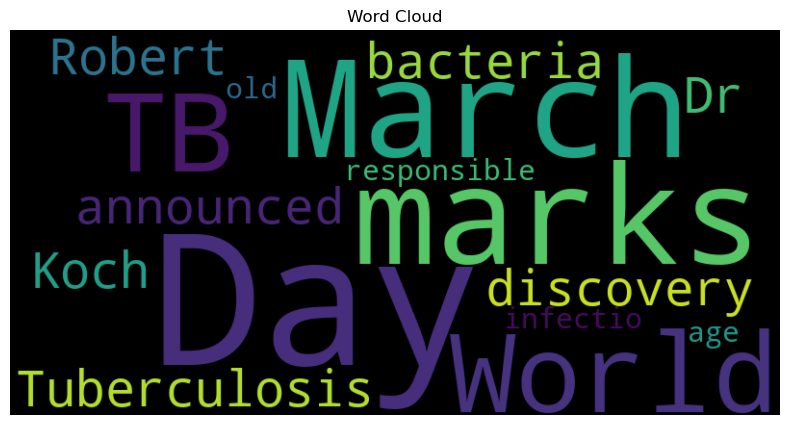


Title: Ericsson to lay off 1,200 jobs in THIS country as 5G spending slows | Mint - Mint
Source: Livemint
Published At: 2024-03-25T15:28:31Z
Description: Ericsson AB, one of the world’s biggest providers of 5G networking equipment, said it will cut 1,200 jobs in Sweden to cope with lower orders and caution from mobile service providers.
URL: https://www.livemint.com/companies/news/ericsson-lay-off-1-200-jobs-sweden-5g-spending-ericsson-shares-11711379861913.html


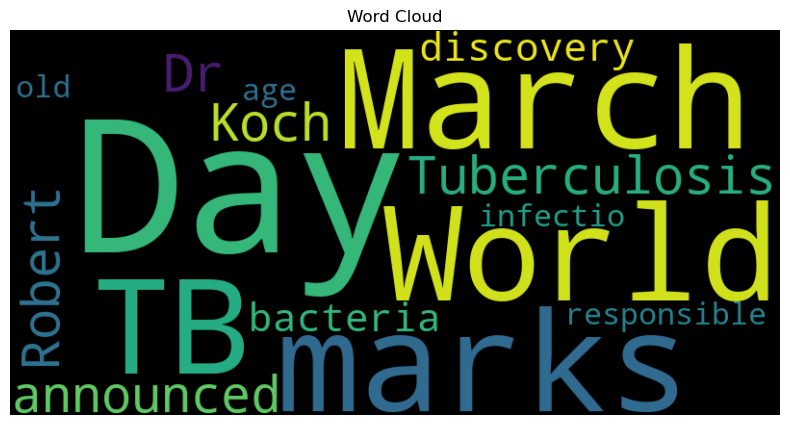


Title: Tuberculosis remains world's second-deadliest infectious disease • FRANCE 24 English - FRANCE 24 English
Source: YouTube
Published At: 2024-03-25T15:11:01Z
Description: March 24 marks World TB (Tuberculosis) Day. On that day in 1882, Dr Robert Koch announced the discovery of the bacteria responsible for this age-old infectio...
URL: https://www.youtube.com/watch?v=o86m-RtmEMo


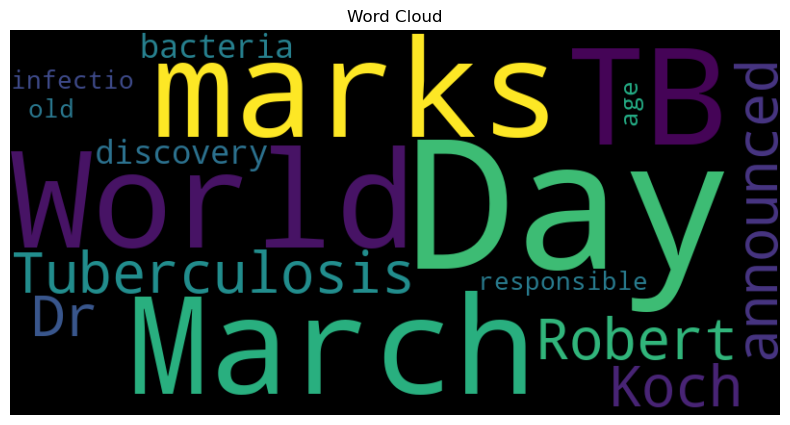

In [14]:
from wordcloud import WordCloud

for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(description)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()
    
    print()

# Unlocking Insights from News Articles: A Dive into Natural Language Processing

Abstract:
In today's digital age, the abundance of news articles circulating online presents both a challenge and an opportunity. How can we sift through this vast ocean of information to extract meaningful insights? The answer lies in the realm of Natural Language Processing (NLP), where advanced algorithms and techniques enable us to analyze, understand, and derive valuable knowledge from textual data.

Understanding Sentiment:
One of the key aspects of news articles is the sentiment they convey. Are they positive, negative, or neutral? The Python script showcased a dual approach to sentiment analysis. Utilizing both TextBlob and VADER, it assessed the emotional tone of each article, providing a nuanced understanding of public opinion.

Summarizing Complexity:
In a world inundated with information, time is of the essence. Text summarization techniques like Latent Semantic Analysis (LSA) offer a solution by condensing lengthy articles into concise summaries. This not only saves time but also facilitates quick comprehension of key points.

Unveiling Topics:
Topics discussed in news articles often span a wide range of subjects. Through the application of Latent Dirichlet Allocation (LDA), an unsupervised learning algorithm, the script delved into topic modeling, uncovering underlying themes and categorizing articles based on content.

Beyond the Surface:
But NLP goes beyond mere sentiment analysis and topic modeling. Named Entity Recognition (NER) capabilities allow us to identify and extract entities such as people, organizations, and locations, shedding light on the key actors and locations shaping the news landscape.

Harnessing Machine Learning:
Furthermore, machine learning models play a pivotal role in automating and enhancing NLP tasks. By leveraging pre-trained models and classifiers, the script showcased how to classify sentiments and predict article categories with accuracy.

Conclusion:
In conclusion, the Python script exemplifies the power of NLP in unraveling the complexities of news articles. From sentiment analysis to topic modeling, from keyword extraction to entity recognition, these techniques offer invaluable insights, empowering us to navigate the ever-evolving landscape of global news with clarity and understanding. As technology continues to advance, so too will our ability to unlock the wealth of knowledge hidden within the pages of every news article.

This article provides an overview of the code's functionality and highlights the significance of NLP in extracting insights from news articles.